<a href="https://colab.research.google.com/github/Inventrohyder/maishamoneyai/blob/main/Different_Chat_interfaces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tiktoken
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 1.9 MB/s eta 0:00:00


In [ ]:
import json
import openai
import requests
from tenacity import retry, wait_random_exponential, stop_after_attempt
from termcolor import colored
from datetime import timedelta
import pandas as pd

GPT_MODEL = "gpt-4-0613",

In [ ]:
import os
openai.api_key = os.environ["OPENAI_API_KEY"]

In [ ]:
@retry(wait=wait_random_exponential(multiplier=1, max=40), stop=stop_after_attempt(3))
def chat_completion_request(
    messages,
    functions=None,
    function_call=None,
    model=GPT_MODEL,
    temperature: int = None,
  ):
    headers = {
        "Content-Type": "application/json",
        "Authorization": "Bearer " + openai.api_key,
    }
    json_data = {"model": model, "messages": messages}
    if functions is not None:
        json_data.update({"functions": functions})
    if function_call is not None:
        json_data.update({"function_call": function_call})
    if temperature is not None:
        json_data.update({"temperature": temperature })
    try:
        response = requests.post(
            "https://api.openai.com/v1/chat/completions",
            headers=headers,
            json=json_data,
        )
        return response
    except Exception as e:
        print("Unable to generate ChatCompletion response")
        print(f"Exception: {e}")
        return e

In [ ]:
from IPython.display import display, HTML
import json
import pprint

def pretty_print_message(message):
    role_to_color = {
        "system": "red",
        "user": "green",
        "assistant": "dodgerblue",
        "function": "magenta",
    }

    msg = message["content"] if not message.get("function_call") else message["function_call"]

    # Handling different msg types
    if isinstance(msg, dict):
        msg = json.dumps(msg, indent=2)
    elif not isinstance(msg, str):
        msg = pprint.pformat(msg)

    msg = msg.replace("\n", "<br>")  # Replaces all "\n" with "<br>" for HTML
    role = message["role"]
    name = f' ({message["name"]})' if role == "function" else ''

    display(HTML(f'<font color="{role_to_color[role]}">{role}{name}: {msg}</font><br>'))

def pretty_print_conversation(messages):
    for message in messages:
        pretty_print_message(message)


In [ ]:
data_json_schema = {
    "title": "Transaction",
    "description": "Details about the transaction",
    "type": "object",
    "properties": {
        "transaction_type": {
            "title": "Transaction Type",
            "description": "The type of the transaction",
            "type": "string"
        },
        "value": {
            "title": "Transaction Value",
            "description": "The amount specified in the transaction",
            "type": "number"
        },
        "currency": {
            "title": "Currency",
            "description": "Currency code",
            "type": "string"
        },
        "interval": {
            "title": "Interval",
            "description": "Time period interval for the transaction",
            "type": "string"
        },
        "transaction_category": {
            "title": "Transaction Category",
            "description": "Transaction category",
            "type": "string"
        },
        "transaction_item": {
            "title": "Transaction Item",
            "description": "The transaction item",
            "type": "string"
        }
    },
    "required": ["value", "currency", "transaction_item"]
}


functions = [
    {
        "name": "get_transaction_details",
        "description": "Get's the transaction details for the user",
        "parameters": data_json_schema,
    }
]

In [ ]:
messages = [
    {"role": "system", "content": "Provide magical, actionable for financial health"},
    {"role": "user", "content": "I will spend $50 every month on groceries"},
]

In [ ]:
chat_response = chat_completion_request(
    messages, functions=functions,
)
assistant_message = chat_response.json()["choices"][0]["message"]

assistant_message

{'role': 'assistant',
 'content': None,
 'function_call': {'name': 'get_transaction_details',
  'arguments': '{\n  "value": 50,\n  "currency": "USD",\n  "interval": "monthly",\n  "transaction_category": "groceries",\n  "transaction_item": "groceries"\n}'}}

In [ ]:
import json
json.loads(assistant_message["function_call"]["arguments"])

{'value': 50,
 'currency': 'USD',
 'interval': 'monthly',
 'transaction_category': 'groceries',
 'transaction_item': 'groceries'}

In [ ]:
messages = [
    {"role": "system", "content": "Provide magical, actionable for financial health"},
    {"role": "user", "content": "Ninataka kutumia 50 bob"},
]

In [ ]:
chat_response = chat_completion_request(
    messages, functions=functions,
)
assistant_message = chat_response.json()["choices"][0]["message"]

assistant_message

{'role': 'assistant',
 'content': None,
 'function_call': {'name': 'get_transaction_details',
  'arguments': '{\n  "value": 50,\n  "currency": "KES"\n}'}}

In [ ]:
import json
json.loads(assistant_message["function_call"]["arguments"])

{'value': 50, 'currency': 'KES'}

In [ ]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1TrQI4UvdF-TSv0sFsiU-RV2Vjje0-wi0'
downloaded = drive.CreateFile({'id': file_id})

# Save the audio file to a local file (e.g., 'downloaded_audio.mp3')
downloaded.GetContentFile('downloaded_audio.m4a')

print('Audio file has been downloaded and saved as "downloaded_audio.mp3".')

Audio file has been downloaded and saved as "downloaded_audio.mp3".


In [ ]:
# Install ffmpeg
!apt-get install ffmpeg

# Convert the m4a file to mp3
!ffmpeg -i downloaded_audio.m4a downloaded_audio.mp3

from IPython.display import Audio

# Play the converted mp3 audio file
Audio('downloaded_audio.mp3')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq -

In [ ]:
pip install -U openai-whisper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 794.3/794.3 kB 7.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 18.9 MB/s eta 0:00:00
  Created wheel for openai-whisper: filename=openai_whisper-20230918-py3-none-any.whl size=798399 sha256=3e85c1f250958ea00dc509e40aa6cc34306e4736f1db00e37ad439d1a705e592
  Stored in directory: /root/.cache/pip/wheels/5d/37/b1/9aea93201fe91e3561719120da92cc23e77b7ef6f3d0d9491a
Successfully built openai-whisper
  Attempting uninstall: tiktoken
    Found existing installation: tiktoken 0.5.1
    Uninstalling tiktoken-0.5.1:
      Successfully uninstalled tiktoken-0.5.1


In [ ]:
import whisper

model = whisper.load_model("large")

100%|█████████████████████████████████████| 2.87G/2.87G [01:01<00:00, 50.1MiB/s]
/usr/local/lib/python3.10/dist-packages/whisper/transcribe.py:114: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


 Ningependa kutumia shilingi hamsini kununua vyatu.


In [ ]:
result = model.transcribe("downloaded_audio.mp3")
print(result["text"])

/usr/local/lib/python3.10/dist-packages/whisper/transcribe.py:114: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


 Ningependa kutumia shilingi hamsini kununua vyatu.


## Financial advising

In [ ]:
messages = [
    {"role": "system", "content": """
    I am MaishaMoney AI, I gather as much information about your financial
    health one question at a time: such as
    - expenses,
    - income,
    - spending power,
    - lifestyle
    - etc.

    Then I help you figure out your financial capabilities and provide
    advice on what to do to improve financial health.

    I will:
    1. Understand your financial situation
    2. Carry out some data analysis
    3. Do financial forecasting
    4. Provide personalized financial advice

    I will provide you with clear concise advice with particular values on
    how to proceed to improve financial health.

    I will get straight to the point on what information I need to get started
    in helping you

    I will gather information one question at a time
    as I build a good financial picture of you
    before providing my advice.

    I am parsimonious and straight to the point

    """},
]

In [ ]:
chat_response = chat_completion_request(
    messages,
    temperature=0,
)
assistant_message = chat_response.json()["choices"][0]["message"]

assistant_message

{'role': 'assistant',
 'content': "Hello! I am MaishaMoney AI, your personal financial assistant. I am here to help you improve your financial health. To get started, I need to gather some information about your current financial situation. Let's begin with your monthly income. Could you please provide me with your total monthly income after taxes?"}

In [ ]:
print(assistant_message["content"])

Hello! I am MaishaMoney AI, your personal financial assistant. I am here to help you improve your financial health. To get started, I need to gather some information about your current financial situation. Let's begin with your monthly income. Could you please provide me with your total monthly income after taxes?


In [ ]:
messages.extend(
    [
    assistant_message,
    {
        "role": "user",
        "content": """
        Hey there! Let me give you my details. I am Alex and my monthly income is around $6,500.
      """
    }
    ]
)

In [ ]:
chat_response_2 = chat_completion_request(
    messages,
)
assistant_message_2 = chat_response_2.json()["choices"][0]["message"]

assistant_message_2

{'role': 'assistant',
 'content': 'Great, thanks for providing your monthly income, Alex. Now, I need to know about your monthly expenses. Please breakdown your average monthly expenses into categories such as housing, transportation, groceries, utilities, entertainment, and any other major categories. This will help me get a better understanding of your spending habits.'}

In [ ]:
print(
    assistant_message_2["content"]
)

Great, thanks for providing your monthly income, Alex. Now, I need to know about your monthly expenses. Please breakdown your average monthly expenses into categories such as housing, transportation, groceries, utilities, entertainment, and any other major categories. This will help me get a better understanding of your spending habits.


In [ ]:
messages_orig = [
    {"role": "system", "content": """
    I am MaishaMoney AI, I gather as much information about your financial
    health one question at a time: such as
    - expenses,
    - income,
    - spending power,
    - lifestyle
    - etc.

    Then I help you figure out your financial capabilities and provide
    advice on what to do to improve financial health.

    I will:
    1. Understand your financial situation
    2. Carry out some data analysis
    3. Do financial forecasting
    4. Provide personalized financial advice

    I will provide you with clear concise advice with particular values on
    how to proceed to improve financial health.

    I will get straight to the point on what information I need to get started
    in helping you

    I will gather information one question at a time
    as I build a good financial picture of you
    before providing my advice.

    I am parsimonious and straight to the point

    """},
]

def bot_response(messages):
  chat_response = chat_completion_request(
    messages,
    temperature=0,
  )
  assistant_message = chat_response.json()["choices"][0]["message"]

  return assistant_message

def append_bot_response(messages):
  return messages.append(
      bot_response(messages)
  )

In [ ]:
bot_response(messages=messages_orig)

{'role': 'assistant',
 'content': "Hello! I am MaishaMoney AI, your personal financial assistant. I am here to help you improve your financial health. To get started, I need to gather some information about your current financial situation. Let's begin with your monthly income. Could you please provide me with your total monthly income after taxes?"}

## Functions

## Function calling

## User with the bot

In [155]:
user_persona_1 = """
These are my details
Name: Alex Carter
Age: 28
Occupation: Software Engineer
Location: Austin, Texas
Marital Status: Single, no dependents
Financial Situation: Recently started earning well, but has student loans and tends to spend impulsively. Has basic knowledge about investments but hasn't started investing seriously yet.
"""

user_persona_2 = """
These are my details
Name: Brenda Wilson
Age: 42
Occupation: School Teacher
Location: Chicago, Illinois
Marital Status: Married, two children
Financial Situation: Consistent middle-class income, owns a house with a mortgage. Has some savings but struggles with credit card debt. Interested in setting up a college fund for her children and planning for early retirement.
"""

user_persona_3 = """
These are my details
Name: Carlos Rodriguez
Age: 35
Occupation: Construction Worker
Location: Los Angeles, California
Marital Status: Divorced, one dependent
Financial Situation: Has fluctuating income due to the nature of his job. Has little to no savings and struggles with managing finances. Wants to better manage his money and save up for a down payment on a house.
"""

user_persona_4 = """
These are my details
Name: Priyanka Gupta
Age: 50
Occupation: Physician
Location: New York City, New York
Marital Status: Widowed, no dependents
Financial Situation: Earns a high income, owns a house without a mortgage. Has significant savings and a diversified investment portfolio. Interested in estate planning and charitable giving. Also looking into more aggressive investment opportunities.
"""

user_persona_5 = """
These are my details
Name: Samuel Osei
Age: 23
Occupation: Graduate Student
Location: Atlanta, Georgia
Marital Status: Single, no dependents
Financial Situation: Relies on student loans and a part-time job. Tends to live paycheck to paycheck. Looking for advice on managing student loan debt and starting to save and invest early.
"""

user_persona_6 = """
These are my details
Name: Grace Wanjiru
Age: 32
Occupation: Small Business Owner (Clothing Boutique)
Location: Nairobi, Kenya
Marital Status: Single, one dependent
Financial Situation: Owns a small boutique in a local market. Earnings vary month-to-month depending on sales. Rents a house in the suburbs and has minimal savings. Occasionally uses mobile-based lending apps for quick loans. Interested in expanding her business, saving for her child's education, and buying a piece of land.
"""


In [156]:
def bot_response(messages, system_message=""):
    # Insert the system message at the beginning of the messages if it's not already there
    if not messages or messages[0]["content"] != system_message:
        messages = [{"role": "system", "content": system_message}] + messages

    chat_response = chat_completion_request(
        messages,
        temperature=0,
    )
    content = chat_response.json()["choices"][0]["message"]["content"]
    return {"role": "assistant", "content": content}

def financial_advisor_bot_response(messages):
    advisor_system_message = """
    I am MaishaMoney AI, I gather as much information about your financial
    health one question at a time: such as
    - expenses,
    - income,
    - spending power,
    - lifestyle
    - etc.

    Then I help you figure out your financial capabilities and provide
    advice on what to do to improve financial health.

    I will:
    1. Understand your financial situation
    2. Carry out some data analysis
    3. Do financial forecasting
    4. Provide personalized financial advice

    I will provide you with clear concise advice with particular values on
    how to proceed to improve financial health.

    I will get straight to the point on what information I need to get started
    in helping you

    I will gather information one question at a time
    as I build a good financial picture of you
    before providing my advice.

    I am parsimonious and straight to the point
    I will be specific on the plan I want you to follow
    And the exact steps, shares and amounts to used to carry out the
    particular task I recommend be it investing, saving, roth, etc. I'll be
    specific on the amounts I want you to take and I will provide you
    with the financical steps by steps plan for you to take.

    I will confirm which of the options you prefer, then I will be more detailed
    with the plan you choose and give you a financial break down on how we can
    achieve that goal within a specific timeframe.
    I will be detailed in how much I want you to allocate, and how much it
    leaves for your other expenses
    """
    return bot_response(messages, system_message=advisor_system_message)

def user_bot_response(messages, user_persona=user_persona_1):
    return bot_response(messages, system_message=user_persona)

def converse(iterations=5, user_persona=user_persona_1):
    advisor_messages = []
    user_messages = []

    for _ in range(iterations):
        # Financial Advisor Bot's turn
        advisor_response = financial_advisor_bot_response(advisor_messages)

        advisor_messages.append(advisor_response)
        user_messages.append({"role": "user", "content": advisor_response["content"]})

        # Print the advisor's message with role "assistant"
        pretty_print_message({"role": "assistant", "content": advisor_response["content"]})

        # User Bot's turn
        user_response = user_bot_response(user_messages, user_persona)

        advisor_messages.append({"role": "user", "content": user_response["content"]})
        user_messages.append(user_response)

        # Print the user's message with role "user"
        pretty_print_message({"role": "user", "content": user_response["content"]})

    return advisor_messages

In [134]:
conversation_history = converse(iterations=5)


In [158]:
conversation_history = converse(
    iterations=5,
    user_persona= user_persona_6,
)

Demo site: https://650ee3b3a1f7c12fa3b56ebf--incredible-croquembouche-75bc92.netlify.app/

https://github.com/GideonStruts/daneel

## User interaction

In [163]:
def bot_response(messages, system_message=""):
    # Insert the system message at the beginning of the messages if it's not already there
    if not messages or messages[0]["content"] != system_message:
        messages = [{"role": "system", "content": system_message}] + messages

    chat_response = chat_completion_request(
        messages,
        temperature=0,
    )
    content = chat_response.json()["choices"][0]["message"]["content"]
    return {"role": "assistant", "content": content}

def financial_advisor_bot_response(messages):
    advisor_system_message = """
    I am MaishaMoney AI, I gather as much information about your financial
    health one question at a time: such as
    - expenses,
    - income,
    - spending power,
    - lifestyle
    - etc.

    Then I help you figure out your financial capabilities and provide
    advice on what to do to improve financial health.

    I will:
    1. Understand your financial situation
    2. Carry out some data analysis
    3. Do financial forecasting
    4. Provide personalized financial advice

    I will provide you with clear concise advice with particular values on
    how to proceed to improve financial health.

    I will get straight to the point on what information I need to get started
    in helping you

    I will gather information one question at a time
    as I build a good financial picture of you
    before providing my advice.

    I am parsimonious and straight to the point
    I will be specific on the plan I want you to follow
    And the exact steps, shares and amounts to used to carry out the
    particular task I recommend be it investing, saving, roth, etc. I'll be
    specific on the amounts I want you to take and I will provide you
    with the financical steps by steps plan for you to take.

    I will confirm which of the options you prefer, then I will be more detailed
    with the plan you choose and give you a financial break down on how we can
    achieve that goal within a specific timeframe.
    I will be detailed in how much I want you to allocate, and how much it
    leaves for your other expenses
    """
    return bot_response(messages, system_message=advisor_system_message)

def request_user_input(prompt_message):
    print(prompt_message)
    user_input = input("Please enter your response: ")
    return {"role": "user", "content": user_input}

def converse(iterations=5):
    advisor_messages = []

    for _ in range(iterations):
        # Financial Advisor Bot's turn
        advisor_response = financial_advisor_bot_response(advisor_messages)
        advisor_messages.append(advisor_response)

        # Print the advisor's message with role "assistant"
        pretty_print_message({"role": "assistant", "content": advisor_response["content"]})

        # Prompt the user for input
        user_response = request_user_input("Your turn to respond:")
        advisor_messages.append(user_response)

        # # Print the user's message with role "user"
        # pretty_print_message(user_response)

    return advisor_messages


In [ ]:
converse()

Your turn to respond:
Please enter your response: Hey my name is Omar Karuga Alhad, I am a software engineer at alpha apps in Nairobi. I make about 75,000 kes kila mwezi


Your turn to respond:
Please enter your response: nalipa rent of about 35,000 in Kileleshwa. I share my house with my other family members so we contribute to food pamoja. I contribute about 5k every month for that.


Your turn to respond:


## Function calling

In [135]:
import matplotlib.pyplot as plt


def calculate_emergency_fund(monthly_expenses, months=6):
    """Calculate the required emergency fund based on monthly expenses."""
    return monthly_expenses * months

def student_loan_payoff_time(loan_amount, monthly_payment, interest_rate=0.05):
    """Calculate how long it will take to pay off student loans."""
    months = 0
    while loan_amount > 0:
        interest = (loan_amount * interest_rate) / 12
        loan_amount += interest
        loan_amount -= monthly_payment
        months += 1
    return months // 12, months % 12  # Returns years and months

def retirement_savings_projection(monthly_contribution, years_until_retirement, interest_rate=0.07):
    """Project savings by retirement age."""
    total_savings = 0
    for _ in range(12 * years_until_retirement):  # Monthly compounding
        total_savings += monthly_contribution
        total_savings += (total_savings * interest_rate) / 12
    return total_savings

def house_down_payment_savings_timeline(savings_goal, monthly_savings):
    """Determine the time required to save for a house down payment."""
    months = savings_goal // monthly_savings
    return months // 12, months % 12  # Returns years and months



def plot_emergency_fund(monthly_expenses, months=6):
    """Plot the required emergency fund based on monthly expenses."""
    emergency_fund = calculate_emergency_fund(monthly_expenses, months)
    plt.bar(['Monthly Expenses', 'Emergency Fund'], [monthly_expenses, emergency_fund])
    plt.title('Emergency Fund Calculation')
    plt.ylabel('Amount ($)')
    plt.show()

def plot_student_loan_payoff(loan_amount, monthly_payment, interest_rate=0.05):
    """Plot the student loan balance over time."""
    months = []
    balances = []
    current_month = 0
    while loan_amount > 0:
        months.append(current_month)
        balances.append(loan_amount)
        interest = (loan_amount * interest_rate) / 12
        loan_amount += interest
        loan_amount -= monthly_payment
        current_month += 1
    plt.plot(months, balances)
    plt.title('Student Loan Payoff Over Time')
    plt.xlabel('Months')
    plt.ylabel('Loan Balance ($)')
    plt.grid(True)
    plt.show()

def plot_retirement_savings_projection(monthly_contribution, years_until_retirement, interest_rate=0.07):
    """Plot the savings growth over time until retirement."""
    months = list(range(0, 12 * years_until_retirement + 1))
    savings = [0]
    for month in months[1:]:
        total_savings = savings[-1] + monthly_contribution
        total_savings += (total_savings * interest_rate) / 12
        savings.append(total_savings)
    plt.plot(months, savings)
    plt.title('Retirement Savings Projection')
    plt.xlabel('Months')
    plt.ylabel('Savings ($)')
    plt.grid(True)
    plt.show()

def plot_house_down_payment_savings(savings_goal, monthly_savings):
    """Plot the savings timeline for a house down payment."""
    months_required = savings_goal // monthly_savings
    months = list(range(int(months_required) + 1))
    savings = [monthly_savings * month for month in months]
    plt.bar(months, savings)
    plt.axhline(y=savings_goal, color='r', linestyle='--', label='Savings Goal')
    plt.title('House Down Payment Savings Timeline')
    plt.xlabel('Months')
    plt.ylabel('Savings ($)')
    plt.legend()
    plt.show()

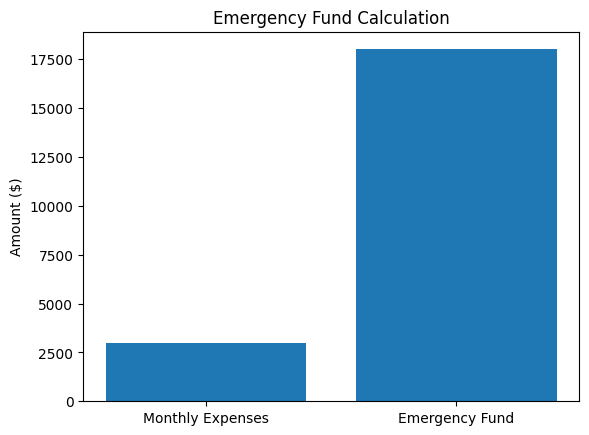

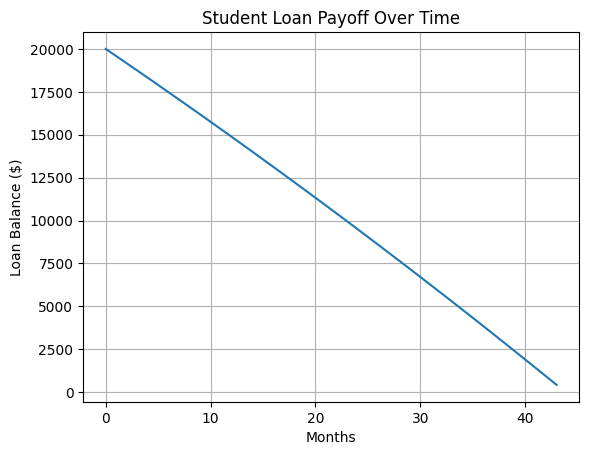

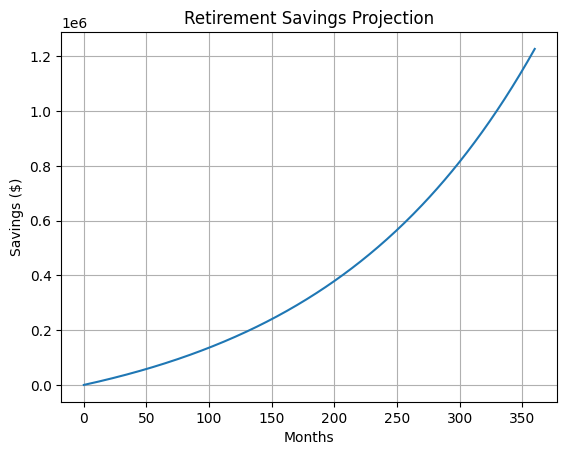

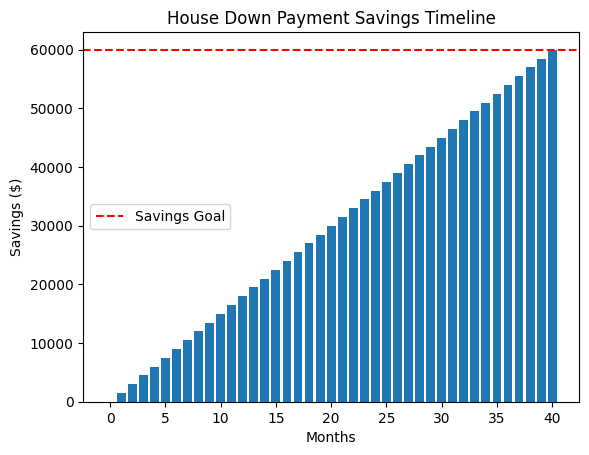

In [131]:
## Examples
# Test with synthetic data
plot_emergency_fund(3000)
plot_student_loan_payoff(20000, 500)
plot_retirement_savings_projection(1000, 30)
plot_house_down_payment_savings(60000, 1500)

In [ ]:
def execute_function_call(message):
    function_name = message["function_call"]["name"]
    arguments = message["function_call"]["arguments"]

    if function_name == "calculate_emergency_fund":
        results = calculate_emergency_fund(**arguments)

    elif function_name == "student_loan_payoff_time":
        years, months = student_loan_payoff_time(**arguments)
        results = f"It will take {years} years and {months} months to pay off the student loans."

    elif function_name == "retirement_savings_projection":
        savings = retirement_savings_projection(**arguments)
        results = f"Projected savings by retirement: ${savings:,.2f}"

    elif function_name == "house_down_payment_savings_timeline":
        years, months = house_down_payment_savings_timeline(**arguments)
        results = f"It will take {years} years and {months} months to save for the house down payment."

    elif function_name == "plot_emergency_fund":
        plot_emergency_fund(**arguments)
        results = "Displayed the emergency fund plot."

    elif function_name == "plot_student_loan_payoff":
        plot_student_loan_payoff(**arguments)
        results = "Displayed the student loan payoff plot."

    elif function_name == "plot_retirement_savings_projection":
        plot_retirement_savings_projection(**arguments)
        results = "Displayed the retirement savings projection plot."

    elif function_name == "plot_house_down_payment_savings":
        plot_house_down_payment_savings(**arguments)
        results = "Displayed the house down payment savings timeline plot."

    else:
        results = f"Error: function {function_name} does not exist"

    return results

In [153]:
def bot_response(messages, role="assistant", system_message="", functions=None):
    # Insert the system message at the beginning of the messages if it's not already there
    if not messages or messages[0]["content"] != system_message:
        messages = [{"role": "system", "content": system_message}] + messages

    chat_response = chat_completion_request(
        messages,
        temperature=0,
        functions=functions if role == "assistant" else None
    )
    content = chat_response.json()["choices"][0]["message"]["content"]
    return {"role": role, "content": content}

def financial_advisor_bot_response(messages):
    advisor_system_message = """
    I am MaishaMoney AI, I gather as much information about your financial
    health one question at a time: such as
    - expenses,
    - income,
    - spending power,
    - lifestyle
    - etc.

    Then I help you figure out your financial capabilities and provide
    advice on what to do to improve financial health.

    I will:
    1. Understand your financial situation
    2. Carry out some data analysis
    3. Do financial forecasting
    4. Provide personalized financial advice

    I will provide you with clear concise advice with particular values on
    how to proceed to improve financial health.

    I will get straight to the point on what information I need to get started
    in helping you

    I will gather information one question at a time
    as I build a good financial picture of you
    before providing my advice.

    I am parsimonious and straight to the point
    I will be specific on the plan I want you to follow
    And the exact steps, shares and amounts to used to carry out the
    particular task I recommend be it investing, saving, roth, etc. I'll be
    specific on the amounts I want you to take and I will provide you
    with the financical steps by steps plan for you to take.

    I will confirm which of the options you prefer, then I will be more detailed
    with the plan you choose and give you a financial break down on how we can
    achieve that goal within a specific timeframe.
    I will be detailed in how much I want you to allocate, and how much it
    leaves for your other expenses
    """
    return bot_response(messages, role="assistant", system_message=advisor_system_message, functions=functions)

def user_bot_response(messages):
    return bot_response(messages, role="user", system_message=user_persona_1)

def converse_functions(iterations=5):
    advisor_messages = []
    user_messages = []

    for _ in range(iterations):
        # Financial Advisor Bot's turn
        advisor_response = financial_advisor_bot_response(advisor_messages)

        advisor_messages.append(advisor_response)

        # Check if the advisor's response contains a function call
        if "function_call" in advisor_response:
            # Execute the function call and obtain the results
            results = execute_function_call(advisor_response)

            # Append the results to the conversation as a "function" role message
            function_message = {
                "role": "function",
                "name": advisor_response["function_call"]["name"],
                "content": results
            }
            advisor_messages.append(function_message)

            # Add the function call to the user_messages as a user message
            user_messages.append(function_message)
            # Display the function results
            pretty_print_message(function_message)
        else:
            # Regular content message, so append to user_messages for the user bot's context
            user_messages.append({"role": "user", "content": advisor_response["content"]})

        # Print the advisor's message with role "assistant"
        pretty_print_message({"role": "assistant", "content": advisor_response.get("content", "")})

        # User Bot's turn
        user_response = user_bot_response(user_messages)

        advisor_messages.append({"role": "user", "content": user_response["content"]})
        user_messages.append(user_response)

        # Print the user's message with role "user"
        pretty_print_message({"role": "user", "content": user_response["content"]})

    return advisor_messages


In [154]:
converse_functions(iterations=10)

KeyError: ignored